##**Integral field Spectroscopy & Astronomical FITS Data cube(X,Y,Z) visualization**
Integral Field Unit (IFU) spectroscopy is a powerful observational technique in astronomy that allows astronomers to obtain spectra(FLUX vs Wavelength) for every point (or small region) across a two-dimensional(X,Y) field of view.

Where as Single slit spectroscopy (often just called slit spectroscopy) is a fundamental technique in astronomical and laboratory spectroscopy where light from a source passes through a narrow slit.

**3D Data cubes:**
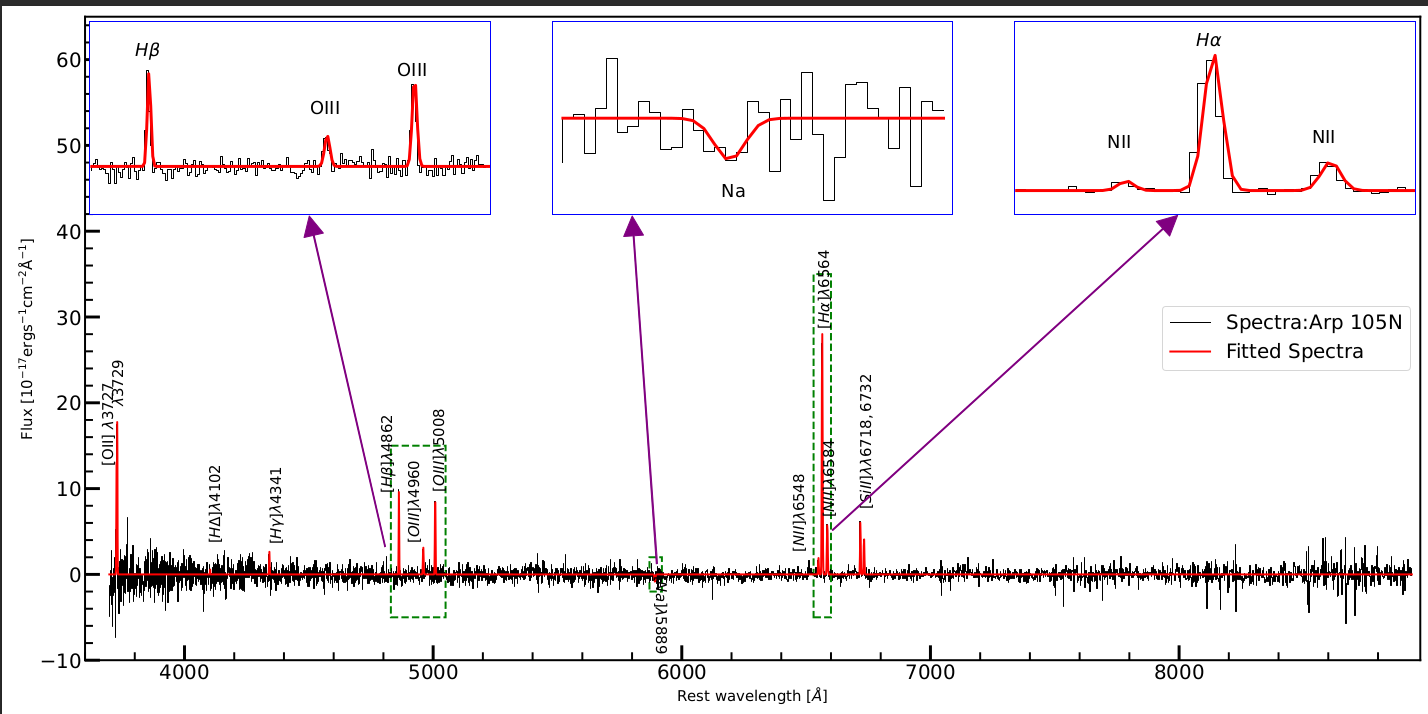

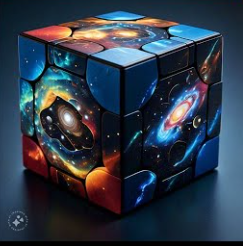

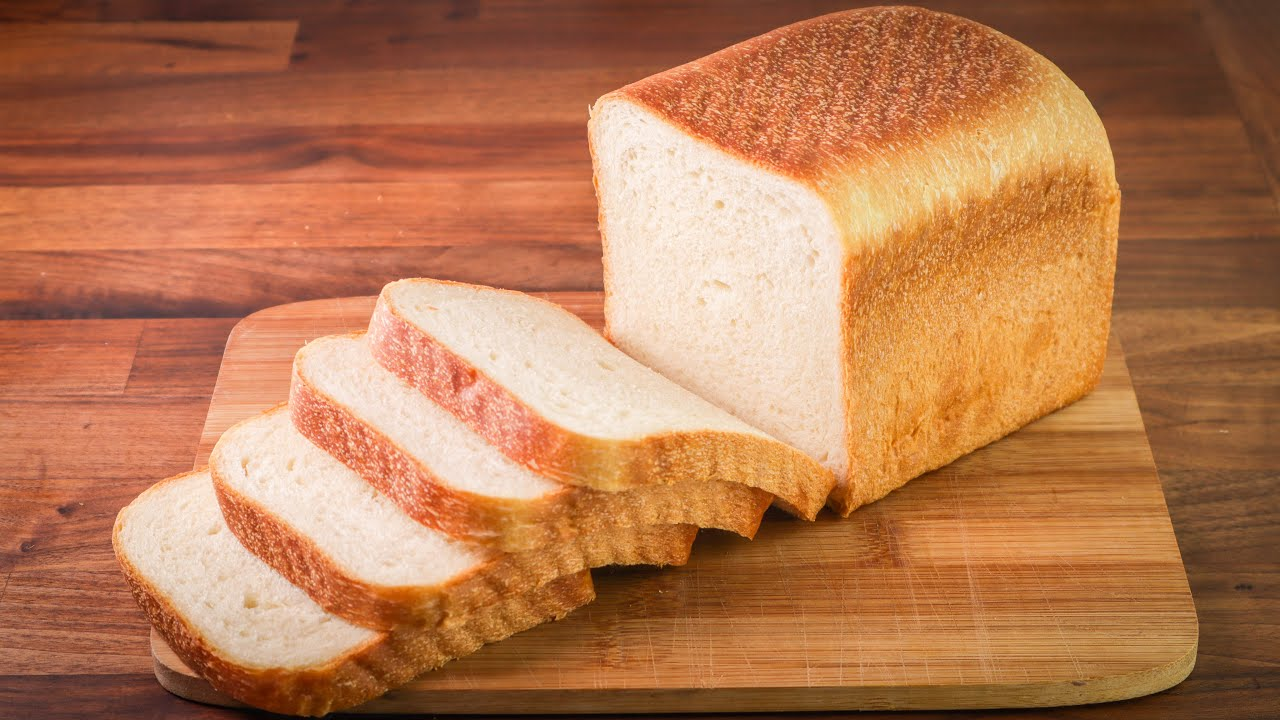

### Step 1: Access Data cube through fits "manga-10215-1902-LINCUBE.fits" at redshift = 0.0259?





### Step 2: Importing important libraries

In [ ]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Mounting drive to get the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 3: Read FITS Data cube of galaxy from SDSS MANGA Survey


In [ ]:
cube = fits.open("/content/drive/MyDrive/fits data_manga/manga-10215-1902-LINCUBE.fits")

### Step 4: Extract FITS Cube information

In [ ]:
cube.info()

Filename: /content/drive/MyDrive/fits data_manga/manga-10215-1902-LINCUBE.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  FLUX          1 ImageHDU       100   (34, 34, 6732)   float32   
  2  IVAR          1 ImageHDU        17   (34, 34, 6732)   float32   
  3  MASK          1 ImageHDU        17   (34, 34, 6732)   int32   
  4  LSFPOST       1 ImageHDU        11   (34, 34, 6732)   float32   
  5  LSFPRE        1 ImageHDU        11   (34, 34, 6732)   float32   
  6  WAVE          1 ImageHDU         9   (6732,)   float64   
  7  SPECRES       1 ImageHDU         9   (6732,)   float64   
  8  SPECRESD      1 ImageHDU         9   (6732,)   float64   
  9  PRESPECRES    1 ImageHDU         9   (6732,)   float64   
 10  PRESPECRESD    1 ImageHDU         9   (6732,)   float64   
 11  OBSINFO       1 BinTableHDU    148   12R x 65C   [26A, 17A, 5A, J, I, 8A, E, E, E, E, E, E, J, J, I, J, E, 12A, J, 8A, E, E, E, E, E, E, E,

### Step 5: Extract cube data from HDUs: Flux, Wavelength, Flux Error etc

In [ ]:
flux = cube[1].data
wavelength = cube[6].data
flux.shape

(6732, 34, 34)

### Step 6: Visualize galaxy flux map along Z: wavelength axis

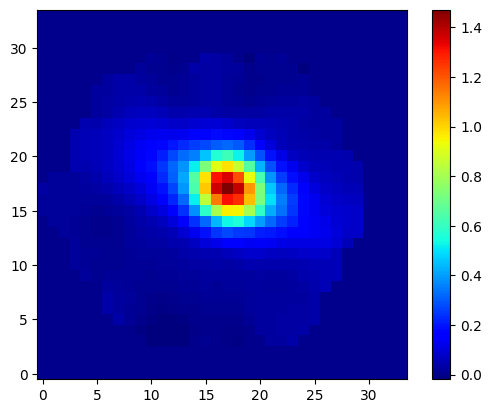

In [20]:
plt.figure()
plt.imshow(flux[4000,:,:], cmap='jet', origin='lower')  #(z,y,x)
plt.colorbar()
plt.show()

### Step 7.1: Visualize Galaxy spectra at each spaxel(x,y) in observed frame

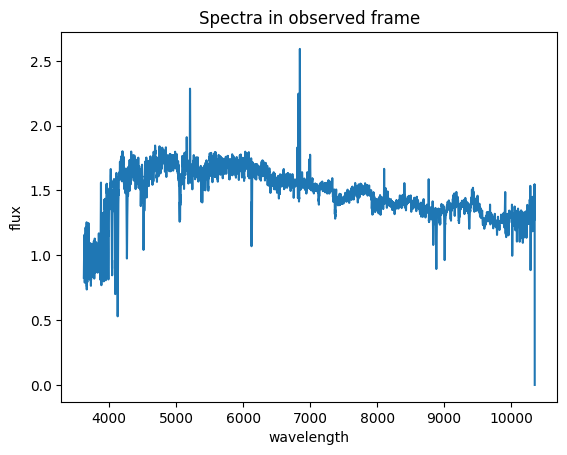

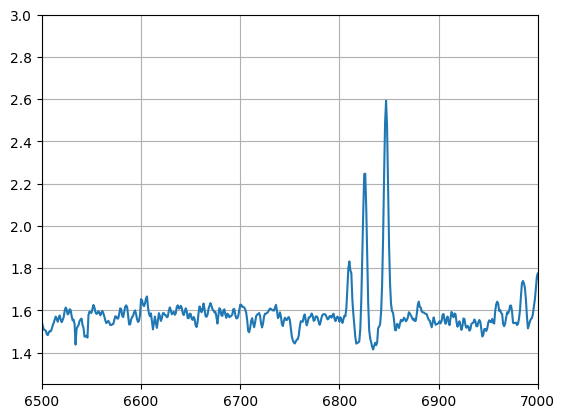

In [ ]:
plt.figure()
plt.plot(wavelength, flux[:, 17, 17])
plt.title('Spectra in observed frame')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.show()

plt.figure()
plt.plot(wavelength, flux[:, 17, 17])
plt.xlim(6500, 7000)
plt.ylim(1.25, 3)
plt.grid(True)
plt.show()

As you can see from the graph the value of x is 6850 in observed frame. As usually when the light reaches us it will be redshifted, so we have to observed the graph again in the rest frame to find out its real value. To do that we have to follow the following step.

### Step 7.2: Visualize Galaxy spectra at each spaxel(x,y) in REST frame
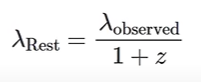


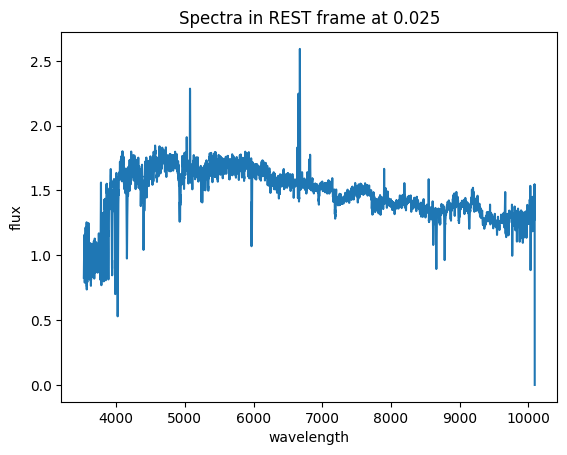

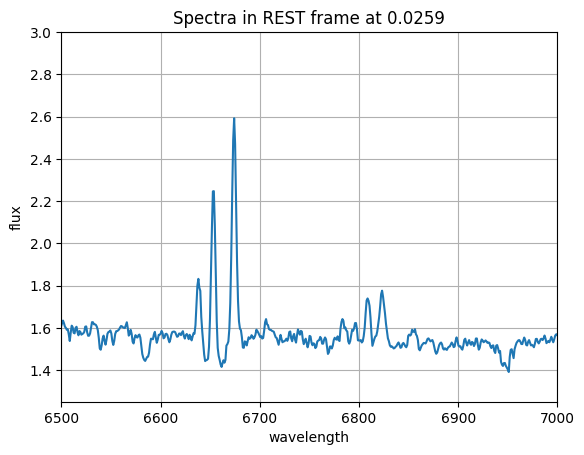

In [ ]:
z=0.0259
wave_rest = wavelength/(1+z) # this will bring the spectra in the rest frame
plt.figure()
plt.plot(wave_rest, flux[:, 17, 17])
plt.title('Spectra in REST frame at 0.025')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.show()

plt.figure()
plt.title('Spectra in REST frame at 0.0259')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.plot(wave_rest, flux[:, 17, 17])
plt.xlim(6500, 7000)
plt.ylim(1.25, 3)
plt.grid(True)
plt.show()

## Step 8: Create a white light

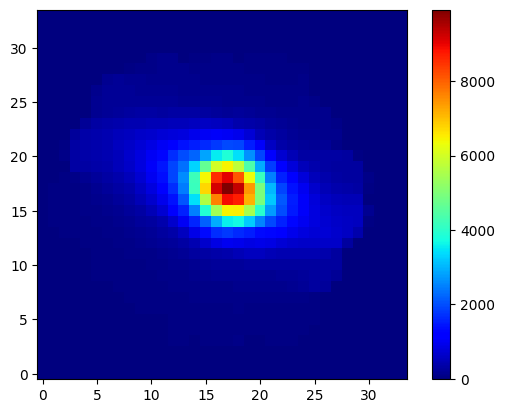

In [21]:
plt.figure()
plt.imshow(np.sum(flux,axis=0), cmap='jet', origin='lower')
plt.colorbar()
plt.show()

### Step 9: Estimate SNR per Z pixel: Signal to Noise Ratio

In [ ]:
ivar=cube[2].data #inverse variance
var=1/ivar  # we converted it into variance
flux_err=np.sqrt(var)
flux_err.shape


/tmp/ipython-input-10-353680339.py:2: RuntimeWarning: divide by zero encountered in divide
  var=1/ivar


(6732, 34, 34)

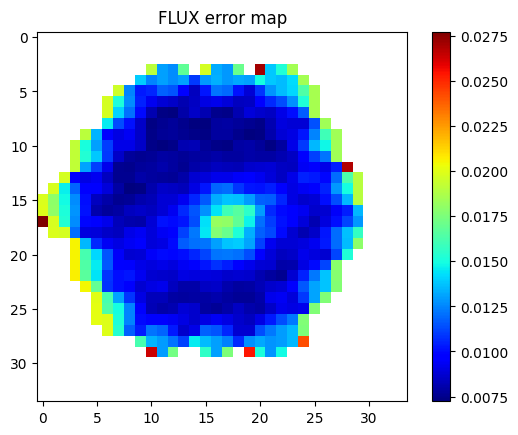

In [ ]:
plt.figure()
plt.imshow(flux_err[4000,:,:], cmap='jet')
plt.colorbar()
plt.title('FLUX error map')
plt.show()


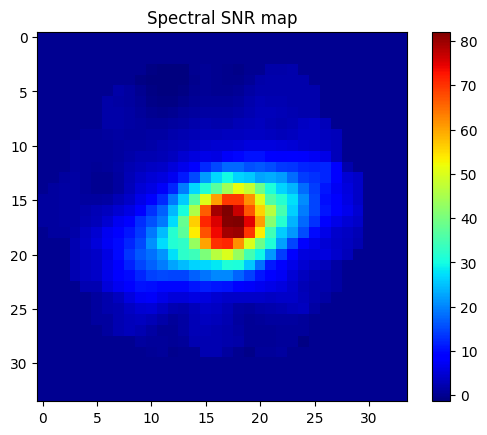

In [ ]:
#SPECTRAL SNR MAP
snr=flux/flux_err
plt.figure()
plt.imshow(snr[4000,:,:], cmap='jet')
plt.colorbar()
plt.title('Spectral SNR map')
plt.show()

## Spectral SNR Plot

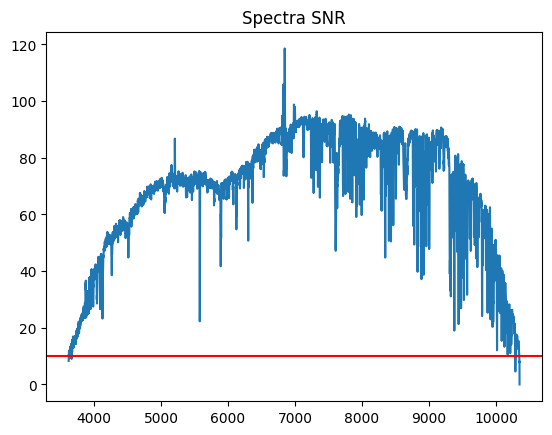

In [ ]:
plt.figure()
plt.plot(wavelength, snr[:,17,17])
plt.title('Spectra SNR')
plt.axhline(y=10, c='red')
plt.show()

###Step 10: Stacking of Spaxel spectra

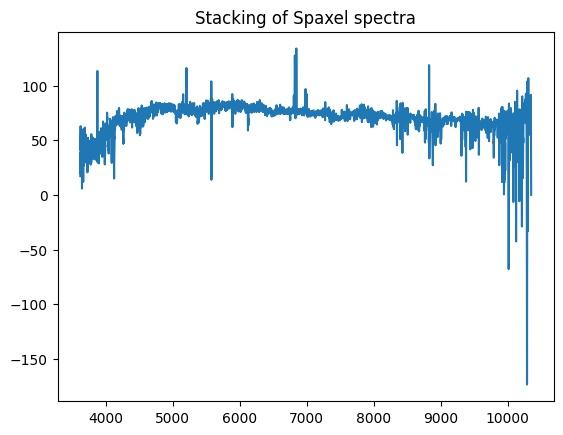

In [16]:
plt.figure()
plt.plot(wavelength, np.sum(flux,axis=(1,2)))
plt.title('Stacking of Spaxel spectra')
plt.show()

### Step11: Stacking of flux map

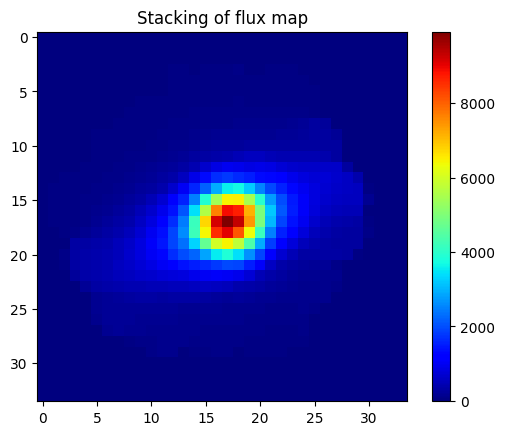

In [17]:
plt.figure()
plt.imshow(np.sum(flux, axis=0), cmap='jet')
plt.title('Stacking of flux map')
plt.colorbar()
plt.show()